# Indian Sign Language Classification using Transfer Learning

<a href="https://www.kaggle.com/code/notshrirang/isl-classification" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
tf.random.set_seed(42)

## Get Data Directories

In [3]:
train_dir = "/kaggle/input/indian-sign-language-dataset/data"

# Custom CNN

## Creating Data Generators

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

## Flow from directory

In [5]:
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224), 
                                               color_mode='rgb',
                                               batch_size=32, 
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset = 'training') 

valid_data = valid_datagen.flow_from_directory(train_dir, 
                                           target_size=(224, 224), 
                                           color_mode='rgb',
                                           batch_size=32, 
                                           class_mode='categorical',
                                           shuffle=False,
                                           subset = 'validation')

Found 33600 images belonging to 35 classes.
Found 8400 images belonging to 35 classes.


## Model Architecture

In [19]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(224, 224, 3), strides=2),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(32, 3, activation="relu", strides=2),
    tf.keras.layers.Conv2D(24, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(24, 3, activation="relu", strides=2),
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(35, activation="softmax")
])

In [20]:
model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
model_1.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data), callbacks=[tf.keras.callbacks.EarlyStopping(min_delta=0.01, patience=2)])

Epoch 1/10
1050/1050 [==============================] - 416s 396ms/step - loss: 7.2950 - accuracy: 0.1062 - val_loss: 4.3027 - val_accuracy: 0.3317
Epoch 2/10
1050/1050 [==============================] - 415s 395ms/step - loss: 3.3971 - accuracy: 0.3270 - val_loss: 2.1412 - val_accuracy: 0.6721
Epoch 3/10
1050/1050 [==============================] - 411s 391ms/step - loss: 2.3053 - accuracy: 0.5254 - val_loss: 1.5254 - val_accuracy: 0.8354
Epoch 4/10
1050/1050 [==============================] - 412s 392ms/step - loss: 1.8264 - accuracy: 0.6712 - val_loss: 1.1474 - val_accuracy: 0.9202
Epoch 5/10
1050/1050 [==============================] - 414s 395ms/step - loss: 1.5257 - accuracy: 0.7626 - val_loss: 1.4603 - val_accuracy: 0.7161
Epoch 6/10
1050/1050 [==============================] - 414s 394ms/step - loss: 1.3182 - accuracy: 0.8222 - val_loss: 0.8495 - val_accuracy: 0.9698
Epoch 7/10
1050/1050 [==============================] - 422s 402ms/step - loss: 1.1572 - accuracy: 0.8602 - val_

In [22]:
history = model_1.history

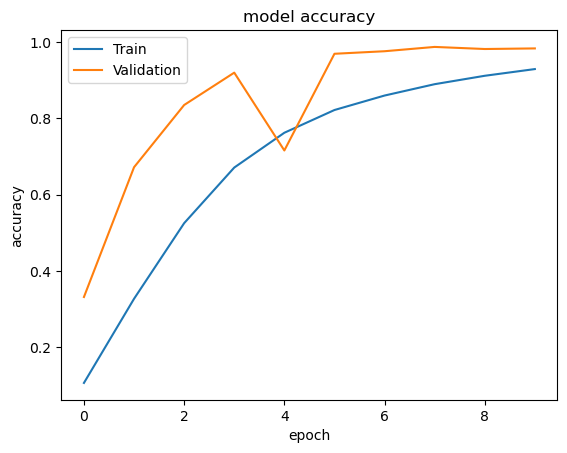

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resenet50_with_augmentation.png")
plt.show()

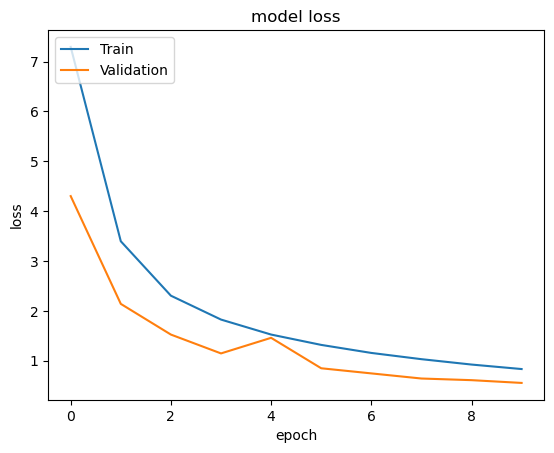

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resenet50_with_augmentation_loss.png")
plt.show()

In [15]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 111, 111, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 batch_normalization_4 (Batc  (None, 109, 109, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 conv2d_27 (Conv2D)          (None, 24, 24, 24)       

In [16]:
model_1.save("model_1_aug.h5")

# Using Transfer Learning

## Getting ResNet50

In [6]:
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', 
                                              include_top=False, 
                                              input_shape=(224, 224, 3), 
                                              classes=35, 
                                              pooling="avg"
                                             )

94765736/94765736 [==============================] - 1s 0us/step


In [7]:
input_shape = (1, 224, 224, 3)

In [8]:
for layer in resnet_model.layers[:143]:
    layer.trainable = False

In [9]:
tl_model_1 = tf.keras.models.Sequential()
tl_model_1.add(resnet_model)
tl_model_1.add(tf.keras.layers.Dropout(0.5))
tl_model_1.add(tf.keras.layers.Dense(35, activation="softmax"))

In [10]:
tl_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 35)                71715     
                                                                 
Total params: 23,659,427
Trainable params: 15,047,715
Non-trainable params: 8,611,712
_________________________________________________________________


In [11]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath="model_checkpoint.h5",
                                                 monitor="val_accuracy",
                                                 mode='max',
                                                 save_best_only = True
                                                )

In [12]:
tl_model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
tl_model_1.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data), callbacks=[tf.keras.callbacks.EarlyStopping(min_delta=0.01, patience=2)])

/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
1050/1050 [==============================] - 697s 649ms/step - loss: 0.8618 - accuracy: 0.7428 - val_loss: 0.2135 - val_accuracy: 0.9219
Epoch 2/10
1050/1050 [==============================] - 541s 515ms/step - loss: 0.1650 - accuracy: 0.9482 - val_loss: 0.1651 - val_accuracy: 0.9565
Epoch 3/10
1050/1050 [==============================] - 544s 518ms/step - loss: 0.1001 - accuracy: 0.9697 - val_loss: 8.4319e-04 - val_accuracy: 1.0000
Epoch 4/10
1050/1050 [==============================] - 541s 515ms/step - loss: 0.0755 - accuracy: 0.9770 - val_loss: 0.7228 - val_accuracy: 0.7658
Epoch 5/10
1050/1050 [==============================] - 533s 507ms/step - loss: 0.0605 - accuracy: 0.9821 - val_loss: 0.0058 - val_accuracy: 0.9993


In [17]:
tl_model_1.save("tl_model_1.h5")

In [18]:
history = tl_model_1.history

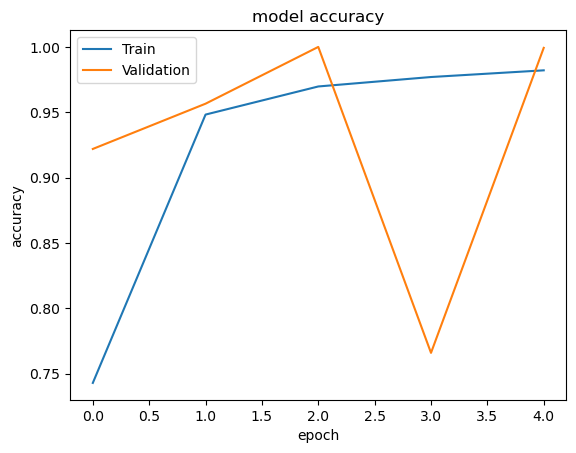

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resenet50_with_augmentation.png")
plt.show()

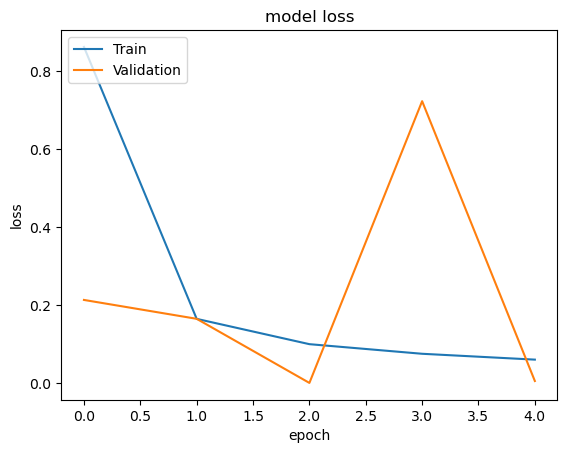

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resenet50_with_augmentation_loss.png")
plt.show()

## Using `image_dataset_from_directory`

In [27]:
train_datagen = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, subset="training", label_mode="categorical", batch_size=32, image_size=(224, 224), validation_split=0.3, seed=42)
valid_datagen = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, subset="validation", label_mode="categorical", batch_size=32, image_size=(224, 224), validation_split=0.3, seed=42)

Found 42000 files belonging to 35 classes.
Using 29400 files for training.
Found 42000 files belonging to 35 classes.
Using 12600 files for validation.


In [28]:
train_datagen

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 35), dtype=tf.float32, name=None))>

In [29]:
train_datagen.class_names

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [30]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.Rescaling(1./255),
], name="data_augmentation")

In [31]:
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', 
                                              include_top=False, 
                                              input_shape=(224, 224, 3), 
                                              classes=35,
                                             )
for layer in resnet_model.layers[:143]:
    layer.trainable = False

In [32]:
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name="input_layer")

x = data_augmentation(inputs)

x = resnet_model(x, training = False)

x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(35, activation="softmax", name="output_layer")(x)

tl_model_2 = tf.keras.Model(inputs, outputs)

In [33]:
tl_model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])

tl_model_2.fit(train_datagen, epochs=40, steps_per_epoch=len(train_datagen), validation_data=valid_datagen, validation_steps=int(0.25 * len(valid_datagen)), callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./logs/'), tf.keras.callbacks.EarlyStopping(min_delta=0.01, patience=3)])

Epoch 1/40
919/919 [==============================] - 376s 403ms/step - loss: 2.6710 - accuracy: 0.2119 - val_loss: 1.8509 - val_accuracy: 0.3929
Epoch 2/40
919/919 [==============================] - 245s 266ms/step - loss: 1.1517 - accuracy: 0.6559 - val_loss: 0.9585 - val_accuracy: 0.7108
Epoch 3/40
919/919 [==============================] - 224s 244ms/step - loss: 0.3891 - accuracy: 0.8960 - val_loss: 1.2691 - val_accuracy: 0.6333
Epoch 4/40
919/919 [==============================] - 218s 237ms/step - loss: 0.1741 - accuracy: 0.9551 - val_loss: 0.1037 - val_accuracy: 0.9592
Epoch 5/40
919/919 [==============================] - 213s 231ms/step - loss: 0.1103 - accuracy: 0.9724 - val_loss: 0.3798 - val_accuracy: 0.8664
Epoch 6/40
919/919 [==============================] - 210s 228ms/step - loss: 0.0827 - accuracy: 0.9788 - val_loss: 0.0252 - val_accuracy: 0.9936
Epoch 7/40
919/919 [==============================] - 206s 224ms/step - loss: 0.0722 - accuracy: 0.9814 - val_loss: 0.3430 -

In [43]:
tl_model_2.save("tl_model_2.h5")

In [44]:
history = tl_model_2.history

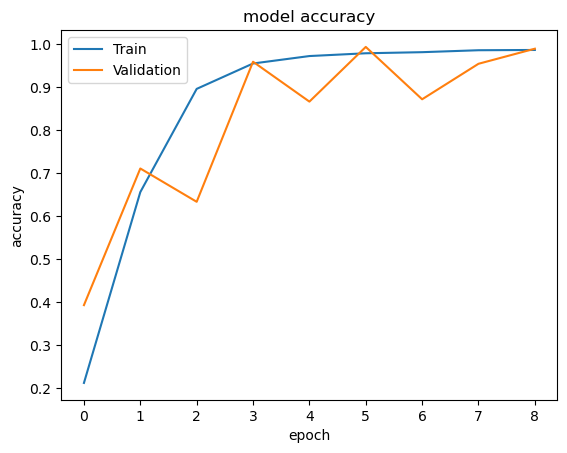

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resenet50_with_augmentation2.png")
plt.show()

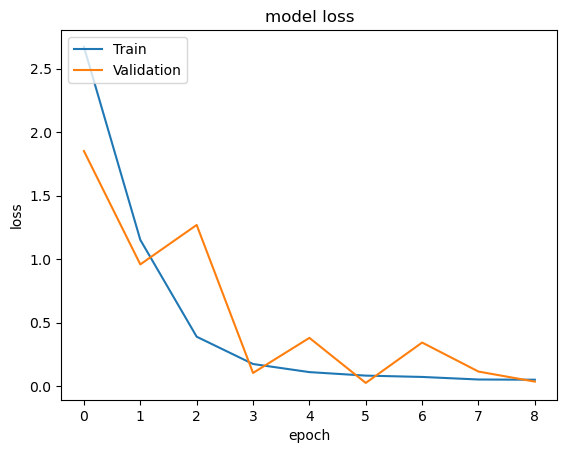

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resenet50_with_augmentation_loss2.png")
plt.show()